# Introduce dataset


In [ ]:
import pandas as pd

Exported dataset from NYC OpenData, saved in Downloads, then uploaded to Jupyter Notebook


In [14]:
df=pd.read_csv('NYPD_Arrest_Data__Year_to_Date.csv')

In [17]:
#Display the first few rows of the dataset to verify it was imported correctly
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


# Data Cleansing

In [19]:
#Exploratory Data Analysis (EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [22]:
#Check for missing values
missing_values=df.isnull().sum()

In [23]:
missing_values

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                         2
PD_DESC                       0
KY_CD                         9
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  402
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

In [134]:
#Define columns to keep
columns_to_keep=['ARREST_KEY','PD_DESC','ARREST_BORO','AGE_GROUP','PERP_SEX','PERP_RACE']

In [135]:
#Subset the DataFrame to include only the selected columns
subset_df=df[columns_to_keep]

In [136]:
#Display the first few rows of of the dataset, to ensure only displaying the selected columns
subset_df.head()

,ARREST_KEY,PD_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,280255493,"ROBBERY,OPEN AREA UNCLASSIFIED",M,<18,M,BLACK
1,279805419,RAPE 1,K,25-44,M,WHITE HISPANIC
2,279895750,ASSAULT 3,Q,65+,F,WHITE
3,280809090,"CONTROLLED SUBSTANCE, POSSESSI",B,45-64,M,BLACK
4,280357135,"ASSAULT 2,1,UNCLASSIFIED",K,25-44,F,BLACK


In [137]:
#Exploratory Data Analysis (EDA) on the subset dataframe
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ARREST_KEY   63621 non-null  int64 
 1   PD_DESC      63621 non-null  object
 2   ARREST_BORO  63621 non-null  object
 3   AGE_GROUP    63621 non-null  object
 4   PERP_SEX     63621 non-null  object
 5   PERP_RACE    63621 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.9+ MB


# Covert Data Type

In [138]:
#List of columns to covert
categorical_columns=['PD_DESC','ARREST_BORO','AGE_GROUP','PERP_SEX','PERP_RACE']


In [139]:
#Covert selected columns to categorical data type
for col in categorical_columns:
    subset_df[col]=subset_df[col].astype('category')

C:\Users\yazhang\AppData\Local\Temp\ipykernel_11052\1166908201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[col]=subset_df[col].astype('category')
C:\Users\yazhang\AppData\Local\Temp\ipykernel_11052\1166908201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[col]=subset_df[col].astype('category')
C:\Users\yazhang\AppData\Local\Temp\ipykernel_11052\1166908201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [140]:
#Perform EDA to ensure data type was successfully coverted
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ARREST_KEY   63621 non-null  int64   
 1   PD_DESC      63621 non-null  category
 2   ARREST_BORO  63621 non-null  category
 3   AGE_GROUP    63621 non-null  category
 4   PERP_SEX     63621 non-null  category
 5   PERP_RACE    63621 non-null  category
dtypes: category(5), int64(1)
memory usage: 880.7 KB


In [141]:
#Initialize a dictionary to store unique values and their counts
unique_counts={}

In [142]:
#Iterate over categorical columns
for col in subset_df.select_dtypes(include='category'):
    #Store unique values and their counts in the dictionary
    unique_counts[col]=subset_df[col].value_counts().to_dict()

In [144]:
#Display unique values and their counts
unique_counts

{'PD_DESC': {'ASSAULT 3': 6597,
  'LARCENY,PETIT FROM OPEN AREAS,': 6526,
  'TRAFFIC,UNCLASSIFIED MISDEMEAN': 3785,
  'ASSAULT 2,1,UNCLASSIFIED': 3593,
  'ROBBERY,OPEN AREA UNCLASSIFIED': 2934,
  'LARCENY,GRAND FROM OPEN AREAS, UNATTENDED': 2497,
  'PUBLIC ADMINISTRATION,UNCLASSI': 2462,
  'CONTROLLED SUBSTANCE, POSSESSI': 2379,
  'THEFT OF SERVICES, UNCLASSIFIE': 2197,
  'MENACING,UNCLASSIFIED': 1497,
  'BURGLARY,UNCLASSIFIED,UNKNOWN': 1417,
  'FORGERY,ETC.-MISD.': 1373,
  'FORGERY,ETC.,UNCLASSIFIED-FELO': 1283,
  'CONTROLLED SUBSTANCE,INTENT TO': 1235,
  'CRIMINAL MIS 2 & 3': 1223,
  'CRIMINAL POSSESSION WEAPON': 1070,
  'STRANGULATION 1ST': 968,
  'CRIMINAL MISCHIEF,UNCLASSIFIED 4': 964,
  'AGGRAVATED HARASSMENT 2': 954,
  'CHILD, ENDANGERING WELFARE': 934,
  'OBSTR BREATH/CIRCUL': 866,
  'WEAPONS, POSSESSION, ETC': 806,
  'ASSAULT POLICE/PEACE OFFICER': 727,
  'INTOXICATED DRIVING,ALCOHOL': 694,
  'TRAFFIC,UNCLASSIFIED INFRACTIO': 691,
  'WEAPONS POSSESSION 3': 624,
  'PUBLIC ADMIN

# Determining an initial comparison point using borough


In [153]:
#Group the data by 'ARREST_BORO', and count the occurrances
grouped_arrest_boro=subset_df.groupby(['ARREST_BORO']).size().reset_index(name='Counts')

In [154]:
grouped_arrest_boro


,ARREST_BORO,Counts
0,B,14221
1,K,17402
2,M,15324
3,Q,13782
4,S,2892


# Checking Overall 'Arrest Case' Occurances based on Sex, Race, and Age Group

In [159]:
#Group the data by 'PERP_SEX', and count the occurrances
grouped_arrest_sex=subset_df.groupby(['PERP_SEX']).size().reset_index(name='Counts')

In [158]:
grouped_arrest_sex

,PERP_SEX,Counts
0,F,11189
1,M,52432


In [161]:
#Group the data by 'PERP_RACE', and count the occurrances
grouped_arrest_race=subset_df.groupby(['PERP_RACE']).size().reset_index(name='Counts')

In [162]:
grouped_arrest_race

,PERP_RACE,Counts
0,AMERICAN INDIAN/ALASKAN NATIVE,185
1,ASIAN / PACIFIC ISLANDER,3543
2,BLACK,29466
3,BLACK HISPANIC,6336
4,UNKNOWN,293
5,WHITE,6607
6,WHITE HISPANIC,17191


In [163]:
#Group the data by 'AGE_GROUP', and count the occurrances
grouped_arrest_age=subset_df.groupby(['AGE_GROUP']).size().reset_index(name='Counts')

In [164]:
grouped_arrest_age

,AGE_GROUP,Counts
0,18-24,10684
1,25-44,37254
2,45-64,12315
3,65+,1041
4,<18,2327


# Filter DataFrame for Brooklyn 

Based on the grouped_data, selecting Boro-'K' (Brooklyn) as the initial comparison point because it has the highest number (17402) of arrest cases out of all the other boroughs

In [167]:
brooklyn_data=subset_df[subset_df['ARREST_BORO']=='K']

In [166]:
brooklyn_data

,ARREST_KEY,PD_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
1,279805419,RAPE 1,K,25-44,M,WHITE HISPANIC
4,280357135,"ASSAULT 2,1,UNCLASSIFIED",K,25-44,F,BLACK
11,281422833,STRANGULATION 1ST,K,25-44,M,BLACK
12,281438374,"ARSON 2,3,4",K,25-44,M,BLACK
13,281179458,"BURGLARY,UNCLASSIFIED,UNKNOWN",K,18-24,M,BLACK
...,...,...,...,...,...,...
63602,282944832,"CONTROLLED SUBSTANCE, INTENT T",K,45-64,M,BLACK
63615,283436353,"FORGERY,ETC.,UNCLASSIFIED-FELO",K,18-24,M,BLACK
63616,282877412,"LARCENY,PETIT FROM OPEN AREAS,",K,45-64,M,WHITE HISPANIC
63618,283387006,"ROBBERY,OPEN AREA UNCLASSIFIED",K,25-44,M,BLACK


In [227]:
#Filter by race in Brooklyn
brooklyn_arrest_race=brooklyn_data.groupby(['PERP_RACE']).size().reset_index(name='Counts')

In [228]:
brooklyn_arrest_race

,PERP_RACE,Counts
0,AMERICAN INDIAN/ALASKAN NATIVE,48
1,ASIAN / PACIFIC ISLANDER,531
2,BLACK,7127
3,BLACK HISPANIC,1764
4,UNKNOWN,80
5,WHITE,1940
6,WHITE HISPANIC,3834


In [177]:
#Filter by age in Brooklyn
brooklyn_arrest_age=brooklyn_data.groupby(['AGE_GROUP']).size().reset_index(name='Counts')

In [178]:
brooklyn_arrest_age

,AGE_GROUP,Counts
0,18-24,2889
1,25-44,10071
2,45-64,3454
3,65+,271
4,<18,717


In [179]:
#Filter by gender in Brooklyn
brooklyn_arrest_gender=brooklyn_data.groupby(['PERP_SEX']).size().reset_index(name='Counts')

In [180]:
brooklyn_arrest_gender

,PERP_SEX,Counts
0,F,3026
1,M,14376


# Comparison within Brooklyn cases, based on Sex, Race and Age Group 

In [190]:
#Group the data by sex and race, and calculate the total count for each
grouped_sex_race_counts=brooklyn_data.groupby(['PERP_SEX','PERP_RACE']).size().reset_index(name='Total_Count')

In [191]:
grouped_sex_race_counts

,PERP_SEX,PERP_RACE,Total_Count
0,F,AMERICAN INDIAN/ALASKAN NATIVE,10
1,F,ASIAN / PACIFIC ISLANDER,134
2,F,BLACK,1783
3,F,BLACK HISPANIC,124
4,F,UNKNOWN,9
5,F,WHITE,404
6,F,WHITE HISPANIC,562
7,M,AMERICAN INDIAN/ALASKAN NATIVE,36
8,M,ASIAN / PACIFIC ISLANDER,710
9,M,BLACK,7949


In [193]:
#Group the data by sex and age group, and calculate the total count for each
grouped_sex_age_counts=brooklyn_data.groupby(['PERP_SEX','AGE_GROUP']).size().reset_index(name='Total_Count')

In [194]:
grouped_sex_age_counts

,PERP_SEX,AGE_GROUP,Total_Count
0,F,18-24,545
1,F,25-44,1773
2,F,45-64,551
3,F,65+,37
4,F,<18,120
5,M,18-24,2344
6,M,25-44,8298
7,M,45-64,2903
8,M,65+,234
9,M,<18,597


# Visualization

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

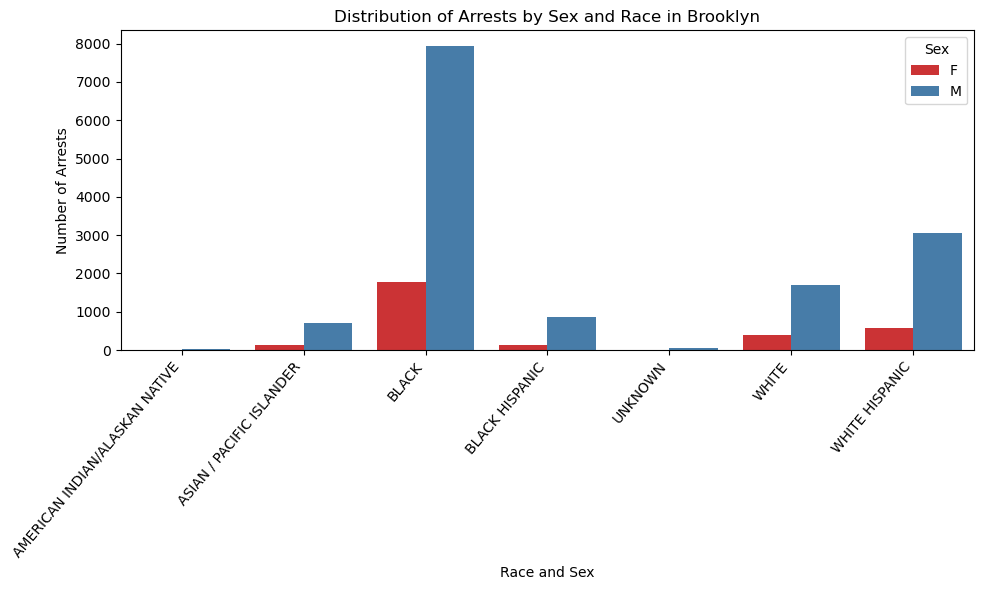

In [207]:
#Plot a stcked bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='PERP_RACE',y='Total_Count',hue='PERP_SEX', data=grouped_sex_race_counts, palette='Set1')
plt.title('Distribution of Arrests by Sex and Race in Brooklyn')
plt.xlabel('Race and Sex')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=50,ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


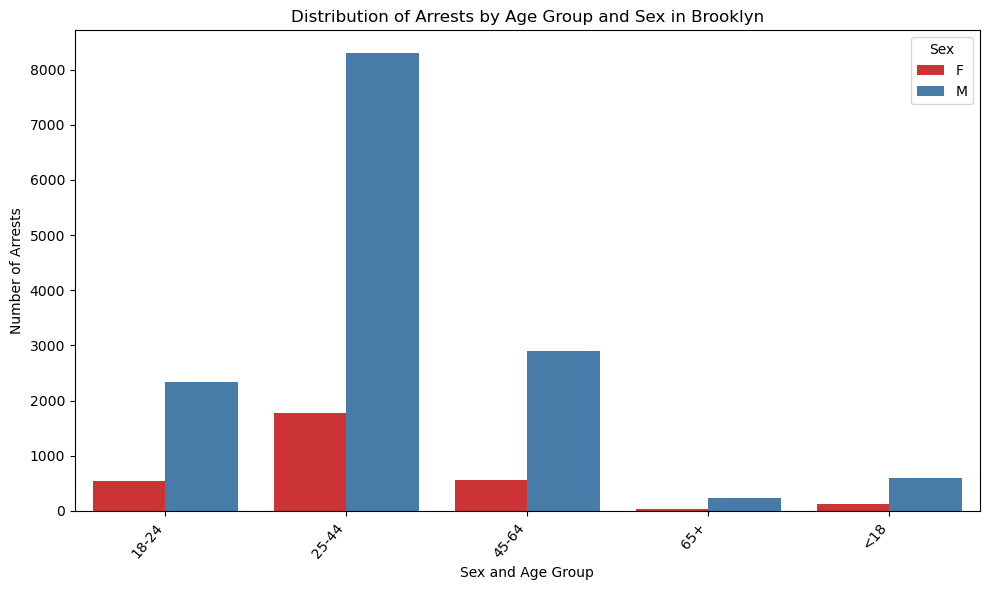

In [209]:
#Plot a stcked bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='AGE_GROUP',y='Total_Count',hue='PERP_SEX', data=grouped_sex_age_counts, palette='Set1')
plt.title('Distribution of Arrests by Age Group and Sex in Brooklyn')
plt.xlabel('Sex and Age Group')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=50,ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# Conclusion Statement

Based on the plotted outcome, it is evident that Black individuals, both male and female, constitute the demographic with the highest number of arrest case in Brooklyn. Additionally, among all Brooklyn arrest cases, individual within the age group of 25-44 exhibit the highest freequency of arrests for both males and females.However, it is important to acknowledge the potential influence of bias within the dataset, such as the size of Black population relative to other racial groups. 